<a href="https://colab.research.google.com/github/AndreMacielSousa/22292-Deep-Learning-Aplicado/blob/main/DLA_Trabalho1_22292.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 1

## Aplicação de redes neurais (neural netwoks, NN)

# Skin Segmentation [link](https://archive.ics.uci.edu/ml/datasets/skin+segmentation)

**Contexto:** Dataset com cores de pele de diferentes para "ensinar" a rede a distinguir se uma dada cor pertence a pele ou não.

**Objetivo:** Distinguir cor de pele de não-pele.

# Trabalho Deep Learning Aplicado 2022 [22292]


André Maciel Sousa [ 1300012 ]

Luís Varela [ 77713 ]



## Apontamentos Teóricos


(5.2.3) The arrow of time— Se você está tentando prever o futuro dado o passado (por exemplo, o clima de amanhã, movimentos de ações e assim por diante), você não deve embaralhar seus dados aleatoriamente antes de dividi-los, porque isso criará um vazamento temporal: seu modelo efetivamente treinados em dados do futuro. Em tais situações, você deve sempre certificar-se de que todos os dados em seu conjunto de teste sejam posteriores aos dados no conjunto de treinamento.

(6.) O fluxo de trabalho universal de machine learning é amplamente estruturado em três partes:

1. **Define the task** - Entenda o domínio do problema e a lógica de negócios subjacente ao que o cliente solicitou. Colete um conjunto de dados, entenda o que os dados representam e escolha como você medirá o sucesso na tarefa.

2. **Develop a model** — prepare seus dados para que possam ser processados por um modelo de aprendizado de máquina, selecione um protocolo de avaliação de modelo e uma linha de base simples a ser superada, treine um primeiro modelo que tenha poder de generalização e que possa se ajustar demais e, em seguida, regularize e ajuste seus model até obter o melhor desempenho de generalização possível. 


```
  Preparar Dados -> 
  Escolher protocolo de Avaliação -> 
        * Holdout / K-Fold...
        * Qual a parte de dados para validação?
  Loss function -> 
        * obter poder estatístico: superar uma linha de base simples
  Ampliar -> 
        * Overfit
  Regularizar e ajuste

```
Fundamentals of machine learning - **Sets de Treinamento, Teste e Validação** [Capitulo 5](https://colab.research.google.com/drive/1ffbUPnolmSYYJNvnnScmtlCkhWw6ciAo?authuser=3#scrollTo=T83HqXMfiq5N&line=1&uniqifier=1)

3. **Deploy the model** — Apresente seu trabalho para as partes interessadas, envie o modelo para um servidor da Web, um aplicativo móvel, uma página da Web ou um dispositivo incorporado, monitore o desempenho do modelo em estado selvagem e comece a coletar os dados necessários para criar a próxima geração modelo.

# Modelo de previsão para a cor de pele

## Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
DATASET_LINK = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'

## Carregamento dos dados do dataset

In [ ]:
#Since dataset does not have labels we added our own.
#isSkin 1 = True, 2 = False
skin_data = pd.read_csv(DATASET_LINK, sep="\t", header=None, names=['blue','green','red', 'isSkin'])

## Separação dos dados de treino e validação

In [ ]:
#Validation data
x_val_skin_data = skin_data.sample(frac=0.05)
skin_data = skin_data.drop(x_val_skin_data.index)
#Test data
x_test_skin_data = skin_data.sample(frac=0.20)
#Train data
x_train_skin_data = skin_data.drop(x_test_skin_data.index)
#get results to create y train and test (isSkin)
y_train_skin_data = x_train_skin_data["isSkin"].replace(2,0) #change 2 to 0
y_test_skin_data = x_test_skin_data["isSkin"].replace(2,0) #change 2 to 0
y_val_skin_data = x_val_skin_data["isSkin"].replace(2,0) #change 2 to 0
#drop the result from x train and test (isSkin)
x_train_skin_data = x_train_skin_data.drop(["isSkin"], axis=1)
x_test_skin_data = x_test_skin_data.drop(["isSkin"], axis=1)
x_val_skin_data = x_val_skin_data.drop(["isSkin"], axis=1)
#temp variable
temp_x_test_skin_data = x_test_skin_data

## Normalização dos dados

In [ ]:
mean = x_train_skin_data.mean(axis=0)
x_train_skin_data -= mean
std = x_train_skin_data.std(axis=0)
x_train_skin_data /= std
x_test_skin_data -= mean
x_test_skin_data /= std

# Vectorize Y train and test
x_train_skin_data = np.asarray(x_train_skin_data).astype("float32")
x_test_skin_data = np.asarray(x_test_skin_data).astype("float32")
y_train_skin_data = np.asarray(y_train_skin_data).astype("float32")
y_test_skin_data = np.asarray(y_test_skin_data).astype("float32")

## Criação do modelo

In [ ]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  #layers.Dropout(0.5),
  layers.Dense(1, activation="relu"),
  #layers.Dropout(0.5),
  layers.Dense(1, activation="sigmoid")
])

## Compilação do modelo

In [ ]:
model.build((None, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop",
  loss=keras.losses.BinaryFocalCrossentropy(),
  metrics=["accuracy"])

## Treinamento do modelo

In [ ]:
history = model.fit(x_train_skin_data, y_train_skin_data, epochs=10, batch_size=512, validation_data=(x_val_skin_data, y_val_skin_data))

Epoch 1/10
364/364 [==============================] - 2s 3ms/step - loss: 0.0635 - accuracy: 0.8774 - val_loss: 0.0431 - val_accuracy: 0.9298
Epoch 2/10
364/364 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9587 - val_loss: 0.0469 - val_accuracy: 0.9147
Epoch 3/10
364/364 [==============================] - 1s 2ms/step - loss: 0.0285 - accuracy: 0.9611 - val_loss: 0.0524 - val_accuracy: 0.9080
Epoch 4/10
364/364 [==============================] - 1s 2ms/step - loss: 0.0240 - accuracy: 0.9702 - val_loss: 0.0350 - val_accuracy: 0.9496
Epoch 5/10
364/364 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9960 - val_loss: 3.4436 - val_accuracy: 0.9106
Epoch 6/10
364/364 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9976 - val_loss: 7.3033 - val_accuracy: 0.8154
Epoch 7/10
364/364 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 0.9979 - val_loss: 16.9070 - val_accuracy: 0.7874
Epoch

## Estatísticas do modelo

### Correlação entre variáveis

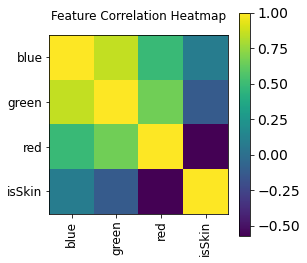

In [ ]:
plt.matshow(skin_data.corr())
plt.xticks(range(skin_data.shape[1]), skin_data.columns, fontsize=12, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(skin_data.shape[1]), skin_data.columns, fontsize=12)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()

### Validation Loss

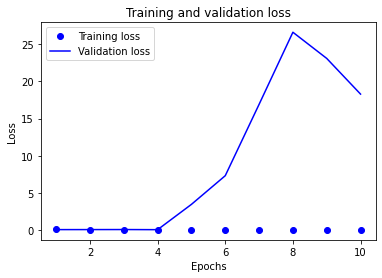

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Accuracy

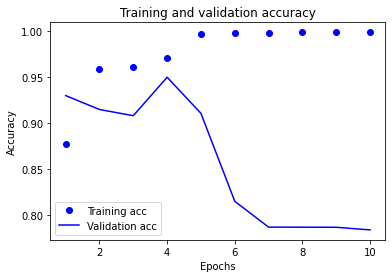

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Previsões

In [ ]:
result = model.predict(x_test_skin_data)
result = np.round(result)
error_amount = 0
for i in range(len(result)):
  if result[i] != y_test_skin_data[i]:
    print(result[i], '-', y_test_skin_data[i])
    error_amount += 1
print("Errors made: %d in %d" % (error_amount, len(result)))

1456/1456 [==============================] - 2s 1ms/step
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[0.] - 1.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[1.] - 0.0
[1.] - 0.0
[0.] - 1.0
[0.] - 1.0
[1.] - 0.0
[0.] - 1.0
Errors made: 59 in 46561
